a. Data Loading (Code Cell)
Load the processed data and parse dates:

In [2]:
import os
import pandas as pd

data_path = os.path.join("..", "data", "processed", "clean_provinceDATA.csv")
df = pd.read_csv(data_path, parse_dates=['PERIOD_START_TIME'])
print("Data shape:", df.shape)
df.head()


Data shape: (8118, 597)


,PERIOD_START_TIME,PROVINCE,CELLS,CELL_AVAIL,LCELLUNAVAILDURSYS,CELL_AVAIL_SYS_exc,CELL_AVAIL_MAN,ERAB_Setup_Succ_Rate_Added,ERAB_EST_SUC_INITIAL,RRC_SSR_SIGNALING,...,Throughput_UE_QCI9_DL_kbps,Voice_Payload_Per_VoLTE_Erlang,RSRP_UL_PUSCH_dB_Avg,RSRP_UL_PUCCH_dBm_Avg,Payload_PDCP_DL_GByte,Payload_PDCP_UL_GByte,Payload_PDCP_Total_GByte,Last_TTI_Payload_Ratio_DL_QCI9,Small_Pkt_Payload_Ratio_UL_All,Throughput_UE_SplitMCG_UL_kbps
0,2023-02-23,KORDESTAN_LMBB,2454.29,99.42,528660,99.75,99.67,99.75,99.80,99.32,...,18459.86,3.29,-116.22,-113.85,144662.42,NaN,NaN,23.00,NaN,NaN
1,2023-02-23,HAMEDAN_LMBB,3102.13,99.46,424575,99.84,99.61,99.73,99.78,99.56,...,20418.05,3.65,-115.07,-112.80,233158.68,NaN,NaN,19.48,NaN,NaN
2,2023-02-23,LORESTAN_LMBB,2915.00,99.78,469230,99.81,99.97,99.81,99.79,99.64,...,19465.79,3.76,-114.88,-113.41,221301.03,NaN,NaN,18.00,NaN,NaN
3,2023-02-23,KERMANSHAH_LMBB,3615.67,99.95,58025,99.98,99.97,99.81,99.83,99.67,...,20149.32,3.52,-115.34,-113.03,239092.73,NaN,NaN,18.04,NaN,NaN
4,2023-02-23,ZANJAN_LMBB,1577.00,99.21,42895,99.97,99.24,99.79,99.75,99.45,...,16536.57,3.58,-117.44,-114.44,136781.58,NaN,NaN,18.93,NaN,NaN


13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for KORDESTAN_LMBB: 2025-03-31 00:00:00


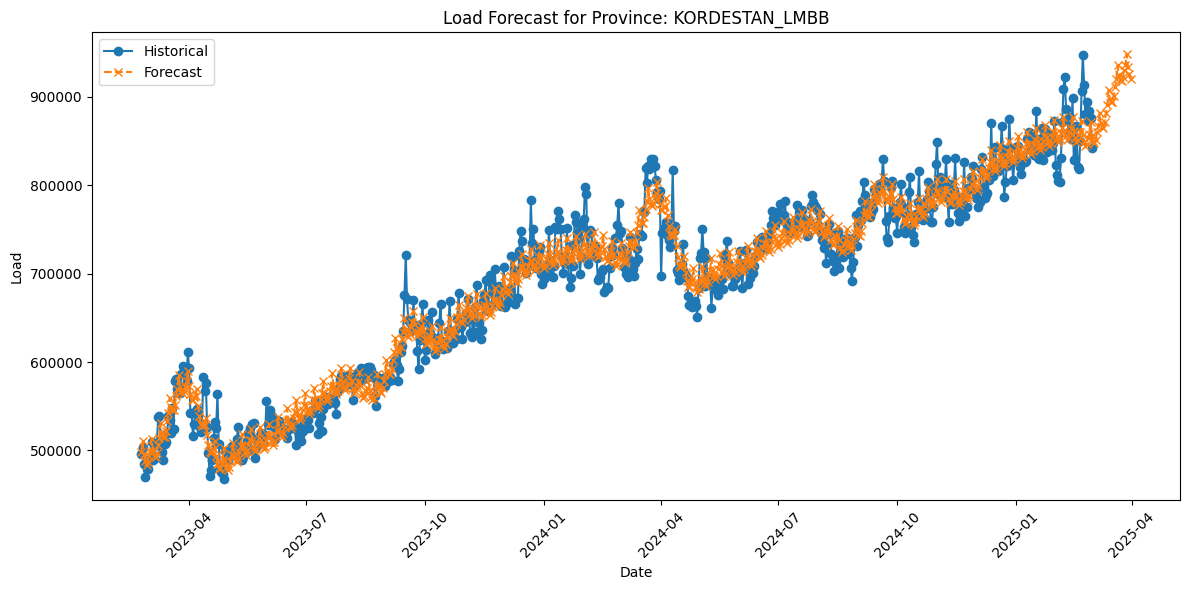

13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:25 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for HAMEDAN_LMBB: 2025-03-31 00:00:00


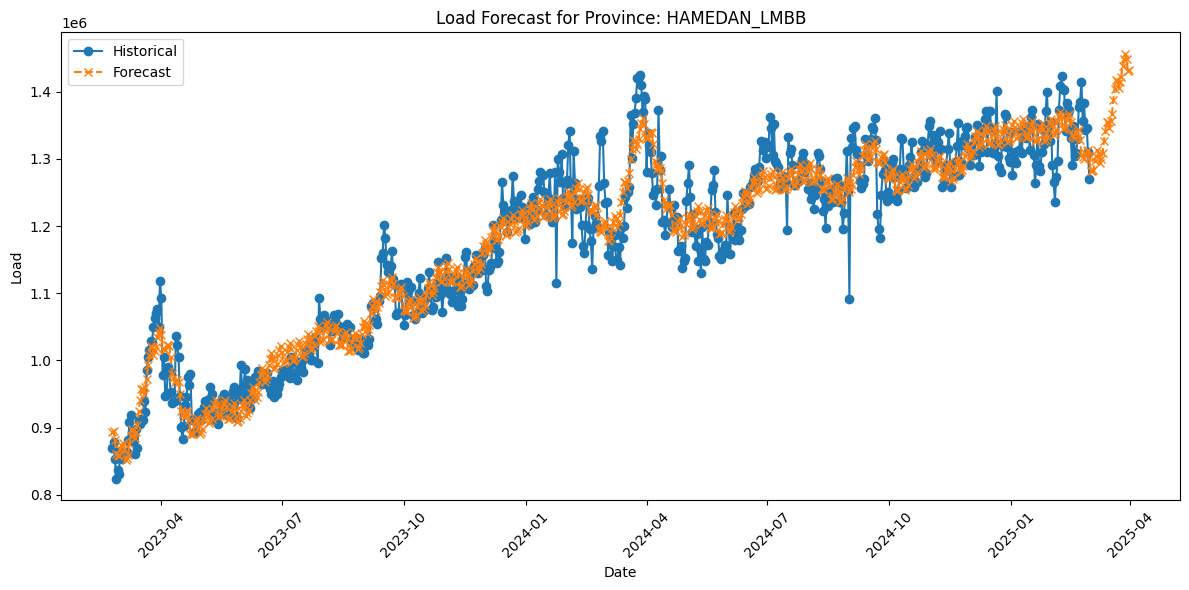

13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for LORESTAN_LMBB: 2025-03-31 00:00:00


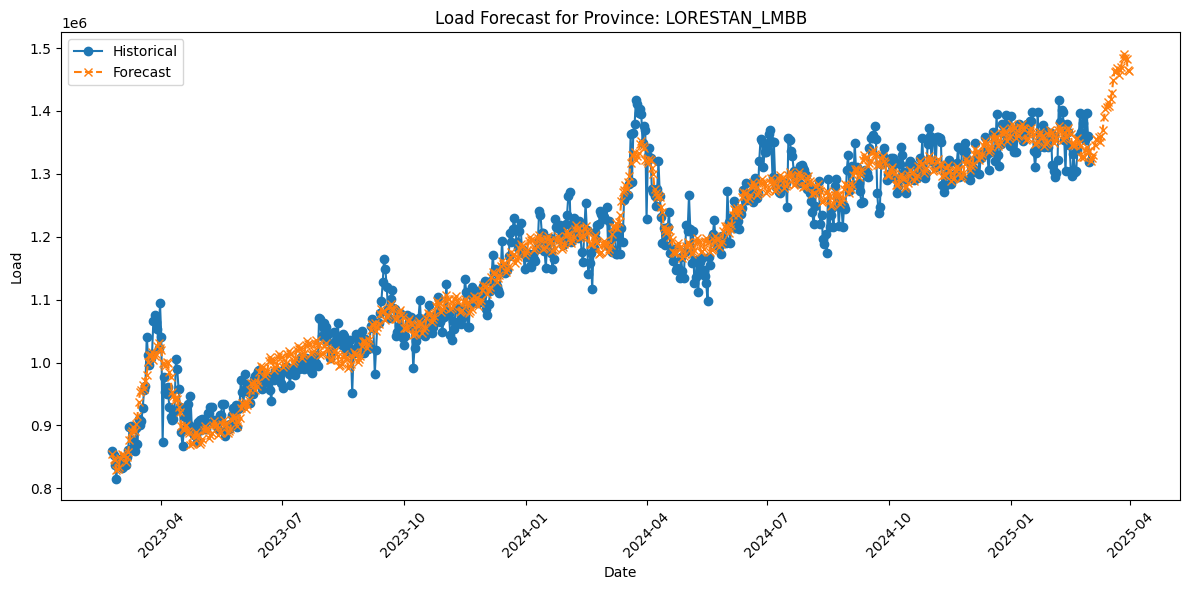

13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:27 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for KERMANSHAH_LMBB: 2025-03-31 00:00:00


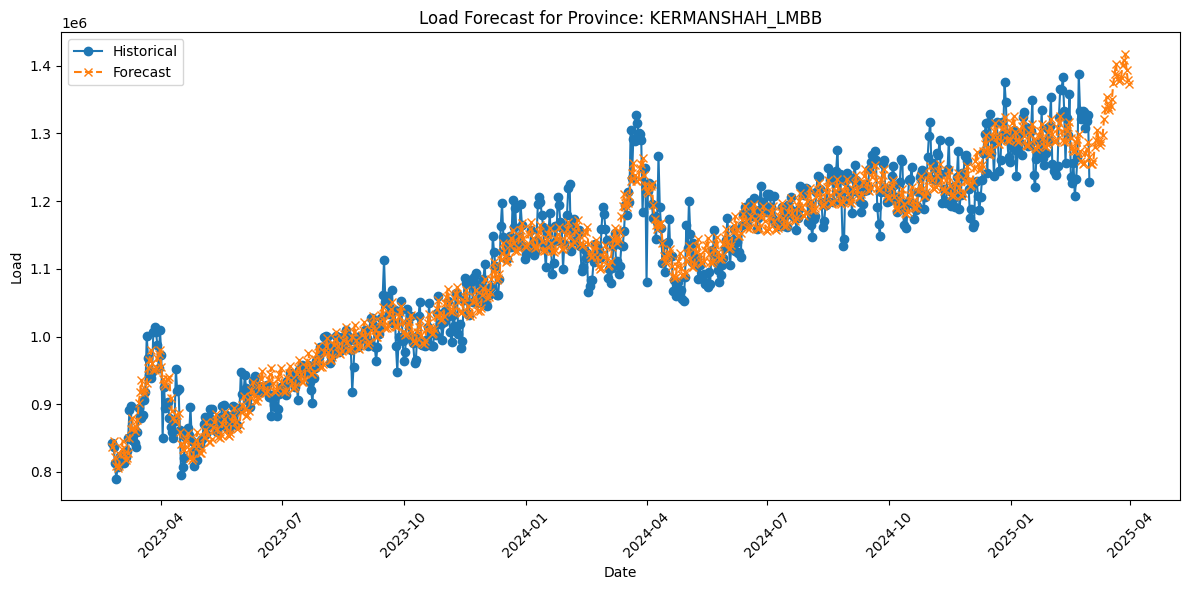

13:19:27 - cmdstanpy - INFO - Chain [1] start processing
13:19:27 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for ZANJAN_LMBB: 2025-03-31 00:00:00


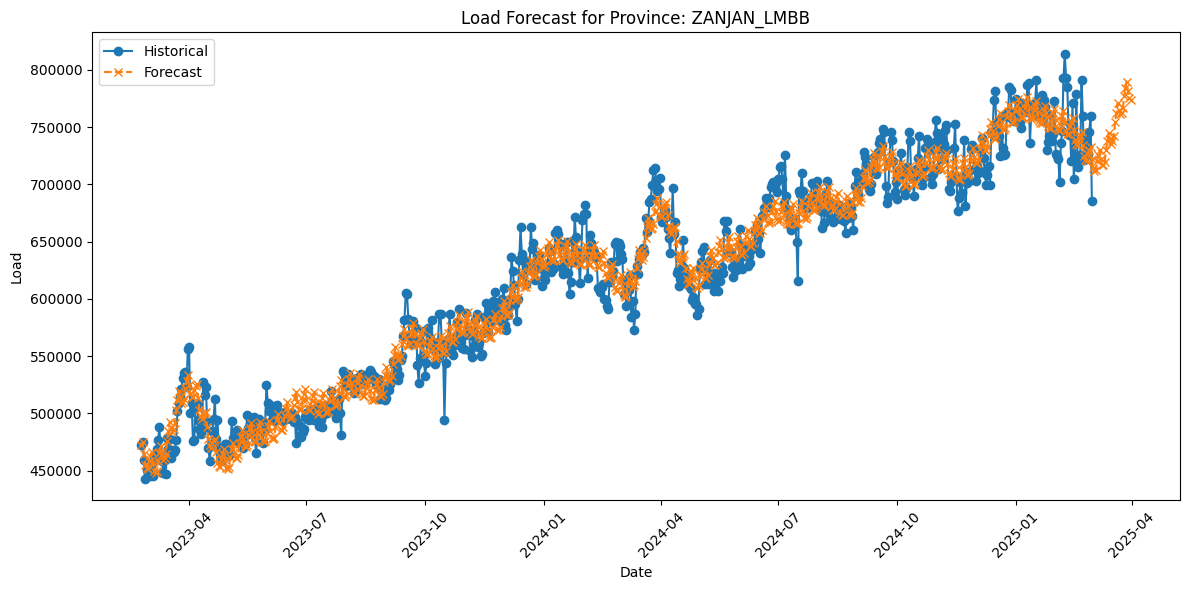

13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for EAST AZARBAIJAN_LMBB: 2025-03-31 00:00:00


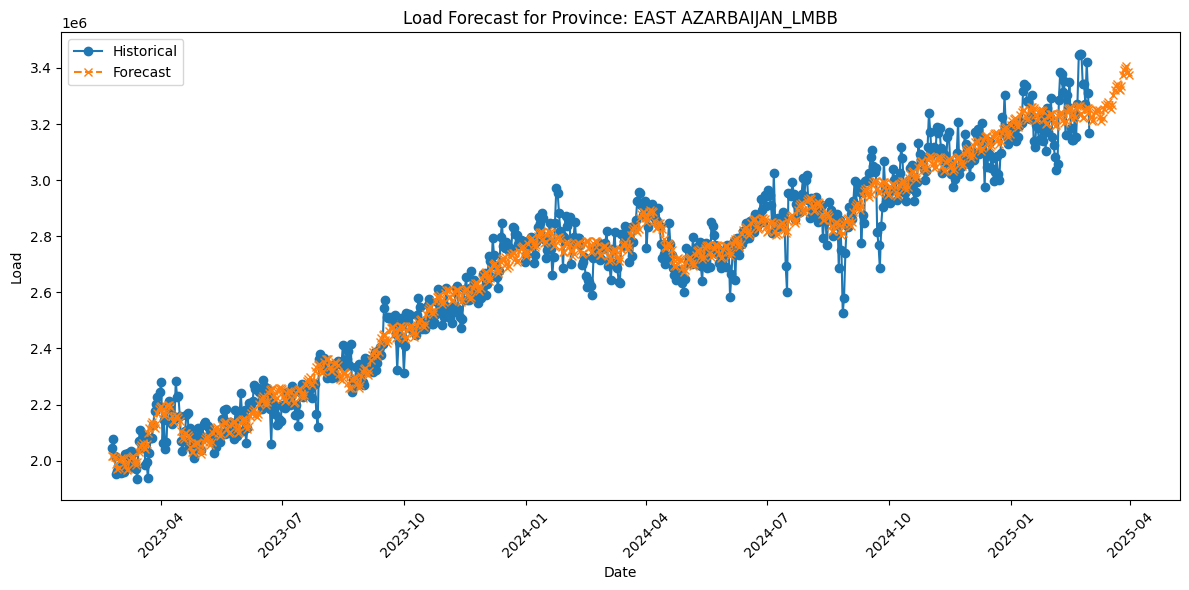

13:19:29 - cmdstanpy - INFO - Chain [1] start processing
13:19:29 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for QAZVIN_LMBB: 2025-03-31 00:00:00


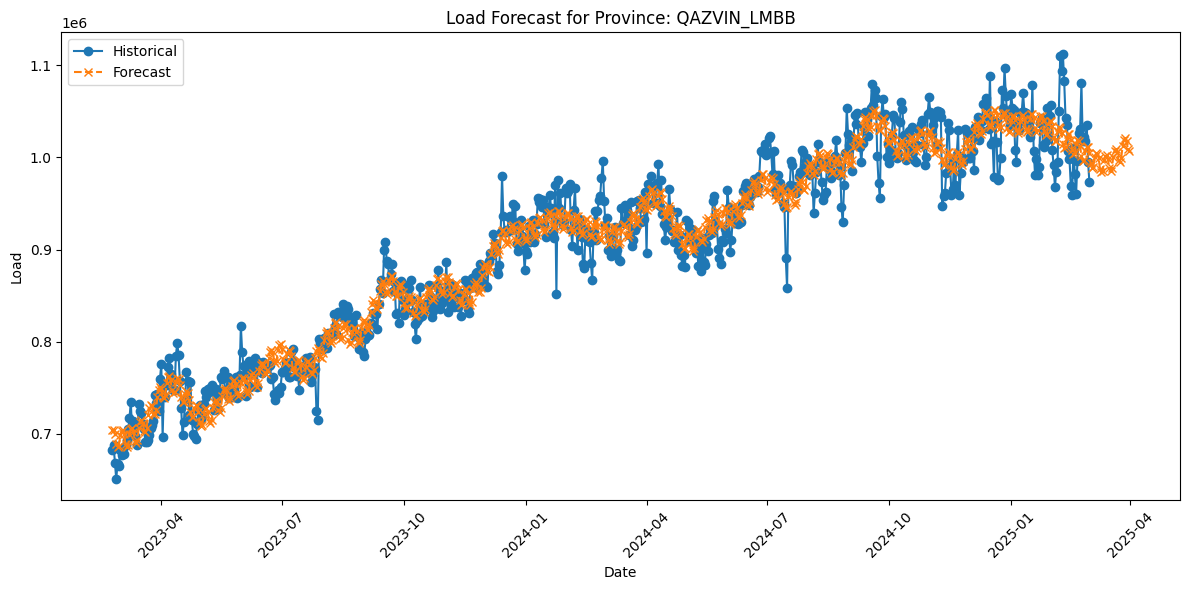

13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for ILAM_LMBB: 2025-03-31 00:00:00


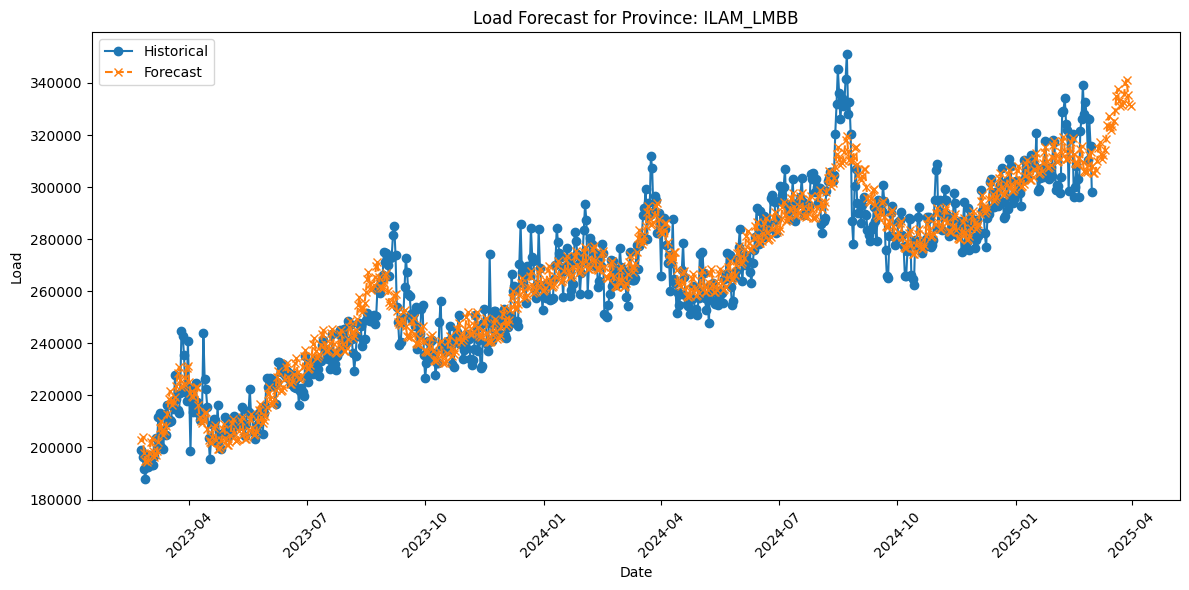

13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:31 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for ARDEBIL_LMBB: 2025-03-31 00:00:00


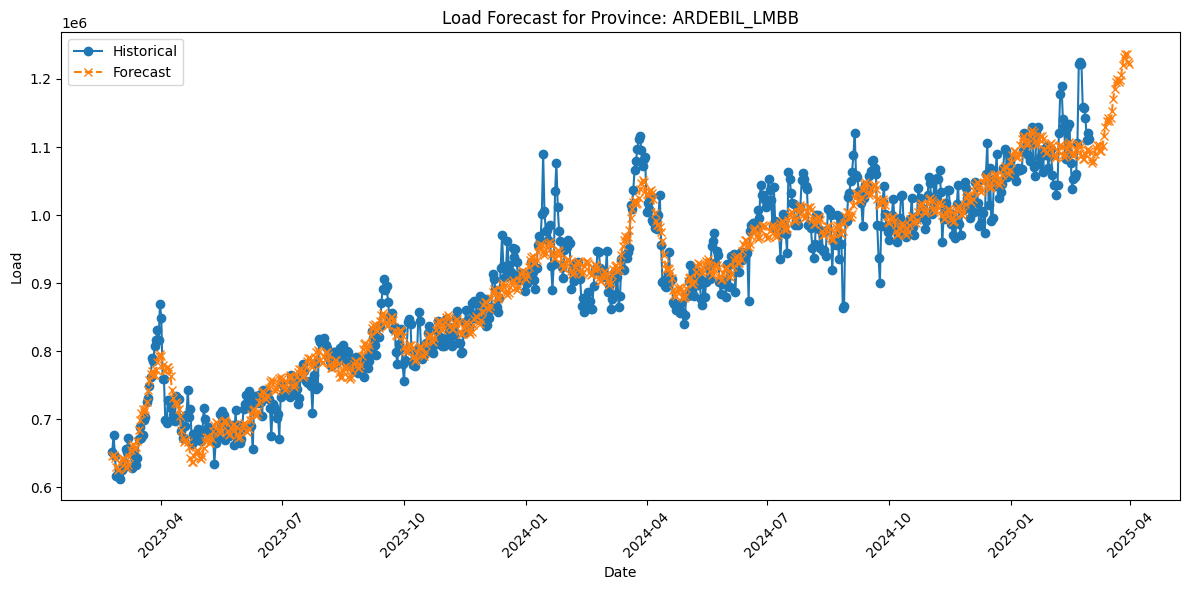

13:19:31 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for MARKAZI_LMBB: 2025-03-31 00:00:00


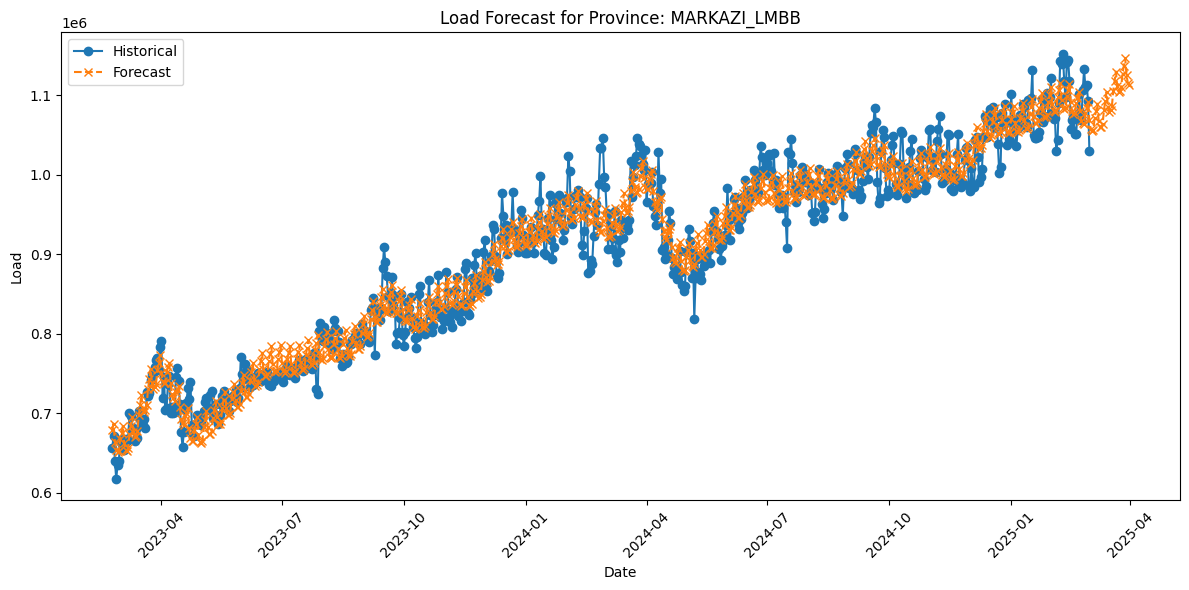

13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing


Last date in forecast for WEST AZARBAIJAN_LMBB: 2025-03-31 00:00:00


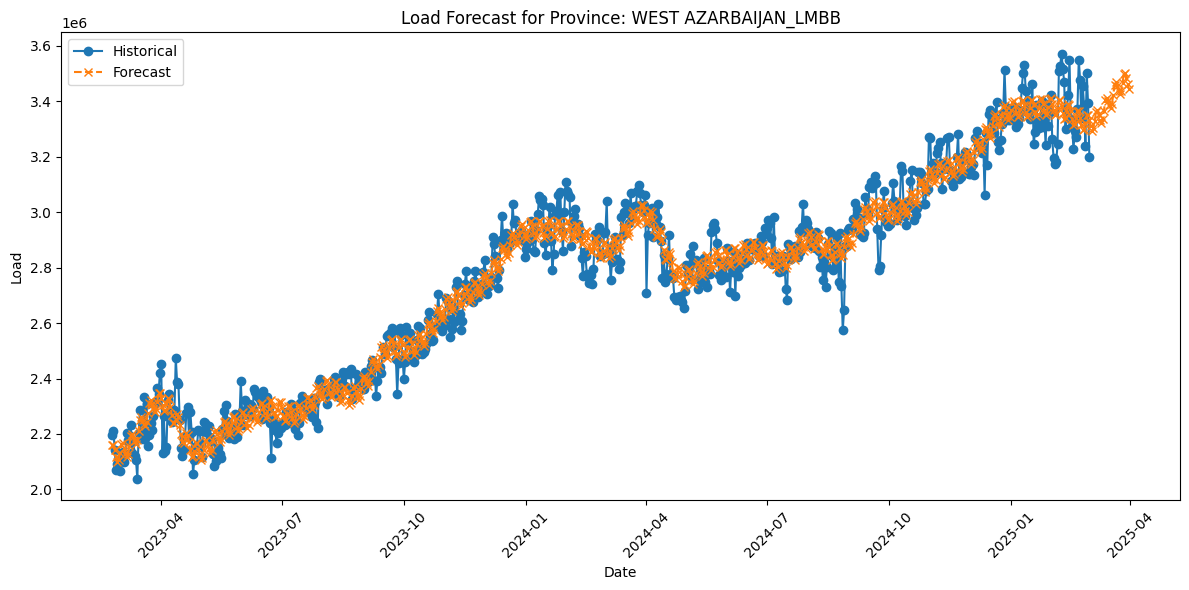

In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Define forecast horizon (e.g., 30 days)
forecast_period = 30

provinces = df['PROVINCE'].unique()

for prov in provinces:
    # Filter data for the current province and rename columns as required by Prophet
    df_prov = df[df['PROVINCE'] == prov][['PERIOD_START_TIME', 'Load']]
    df_prov = df_prov.rename(columns={'PERIOD_START_TIME': 'ds', 'Load': 'y'})
    df_prov['ds'] = pd.to_datetime(df_prov['ds'])
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prov)
    
    # Create a dataframe for future dates (30 days ahead)
    future = model.make_future_dataframe(periods=forecast_period, freq='D')
    forecast = model.predict(future)
    # Check the maximum date in the forecast
    max_date = forecast['ds'].max()
    print(f"Last date in forecast for {prov}: {forecast['ds'].max()}")

    # Plot historical data and forecast together with clear legends
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot historical (training) data with markers and solid line
    ax.plot(df_prov['ds'], df_prov['y'], label="Historical", marker='o', linestyle='-')
    
    # Plot forecasted data with different markers and dashed line
    ax.plot(forecast['ds'], forecast['yhat'], label="Forecast", marker='x', linestyle='--')
    
    ax.set_title(f"Load Forecast for Province: {prov}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Load")
    ax.legend()  # Display legend
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Optionally, save forecast results to a CSV file per province
    forecast.to_csv(os.path.join("..","data", "processed", f"forecast_{prov}.csv"), index=False)


Forecasting Loop for Each Province Using Prophet (Code Cell)

In [6]:
df_prov = df[df['PROVINCE'] == prov][['PERIOD_START_TIME', 'Load']]
df_prov = df_prov.rename(columns={'PERIOD_START_TIME': 'ds', 'Load': 'y'})
df_prov['ds'] = pd.to_datetime(df_prov['ds'])
